In [58]:
# src:
# https://towardsdatascience.com/a-complete-guide-to-creating-choropleth-maps-in-python-728ee2949db4

# see also this on how to add pyhton env to jupyter:
# https://medium.com/@nrk25693/how-to-add-your-conda-environment-to-your-jupyter-notebook-in-just-4-steps-abeab8b8d084

import numpy as np
import pandas as pd
#data = pd.read_csv('resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
data = pd.read_csv('november_sales.csv')
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2020-11,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1977,55 years 09 months,338000
1,2020-11,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1978,56 years 03 months,285000
2,2020-11,ANG MO KIO,3 ROOM,308A,ANG MO KIO AVE 1,01 TO 03,70.0,Model A,2012,90 years 11 months,424000
3,2020-11,ANG MO KIO,3 ROOM,310C,ANG MO KIO AVE 1,01 TO 03,70.0,Model A,2012,90 years 11 months,420000
4,2020-11,ANG MO KIO,3 ROOM,208,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,54 years 09 months,258000


In [5]:
data['full_address'] = data['block'] + ' ' + data['street_name'] + ' ' + 'SINGAPORE'
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address
0,2020-11,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1977,55 years 09 months,338000,220 ANG MO KIO AVE 1 SINGAPORE
1,2020-11,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1978,56 years 03 months,285000,225 ANG MO KIO AVE 1 SINGAPORE
2,2020-11,ANG MO KIO,3 ROOM,308A,ANG MO KIO AVE 1,01 TO 03,70.0,Model A,2012,90 years 11 months,424000,308A ANG MO KIO AVE 1 SINGAPORE
3,2020-11,ANG MO KIO,3 ROOM,310C,ANG MO KIO AVE 1,01 TO 03,70.0,Model A,2012,90 years 11 months,420000,310C ANG MO KIO AVE 1 SINGAPORE
4,2020-11,ANG MO KIO,3 ROOM,208,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,54 years 09 months,258000,208 ANG MO KIO AVE 1 SINGAPORE


In [6]:
address_df = pd.DataFrame(data.full_address.unique(), columns=['Address'])
address_df.head()

,Address
0,220 ANG MO KIO AVE 1 SINGAPORE
1,225 ANG MO KIO AVE 1 SINGAPORE
2,308A ANG MO KIO AVE 1 SINGAPORE
3,310C ANG MO KIO AVE 1 SINGAPORE
4,208 ANG MO KIO AVE 1 SINGAPORE


In [8]:
"""
# this code will try to do thousands lookups using Google. Run at your peril.

import googlemaps
gmaps_key = googlemaps.Client(key = "xxxx")  # my geocoding API key
address_df["LAT"] = None
address_df["LON"] = None

for i in range(len(address_df)):
    geocode_result = gmaps_key.geocode(address_df.iat[i,0])
    try:
        lat = geocode_result[0]["geometry"]["location"]["lat"]
        lng = geocode_result[0]["geometry"]["location"]["lng"]
        address_df.iat[i, address_df.columns.get_loc("LAT")] = lat
        address_df.iat[i, address_df.columns.get_loc("LON")] = lng
    except Exception as e:
        print(e)
"""

list index out of range
list index out of range


In [9]:
address_df.head()

,Address,LAT,LON
0,220 ANG MO KIO AVE 1 SINGAPORE,1.36563,103.84
1,225 ANG MO KIO AVE 1 SINGAPORE,1.36747,103.838
2,308A ANG MO KIO AVE 1 SINGAPORE,1.36551,103.844
3,310C ANG MO KIO AVE 1 SINGAPORE,1.36438,103.845
4,208 ANG MO KIO AVE 1 SINGAPORE,1.36547,103.843


In [10]:
#address_df.to_csv('address_df.csv')

In [11]:
small_df = pd.read_csv('address_df.csv')

In [12]:
pd.options.mode.chained_assignment = None
df = data.merge(small_df, left_on='full_address', right_on='Address')
df.drop(columns=['Address'], inplace=True)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Unnamed: 0,LAT,LON
0,2020-11,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1977,55 years 09 months,338000,220 ANG MO KIO AVE 1 SINGAPORE,0,1.365628,103.840420
1,2020-11,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,01 TO 03,67.0,New Generation,1977,55 years 08 months,305000,220 ANG MO KIO AVE 1 SINGAPORE,0,1.365628,103.840420
2,2020-11,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1978,56 years 03 months,285000,225 ANG MO KIO AVE 1 SINGAPORE,1,1.367473,103.838065
3,2020-11,ANG MO KIO,3 ROOM,308A,ANG MO KIO AVE 1,01 TO 03,70.0,Model A,2012,90 years 11 months,424000,308A ANG MO KIO AVE 1 SINGAPORE,2,1.365515,103.844066
4,2020-11,ANG MO KIO,3 ROOM,310C,ANG MO KIO AVE 1,01 TO 03,70.0,Model A,2012,90 years 11 months,420000,310C ANG MO KIO AVE 1 SINGAPORE,3,1.364380,103.844868


In [85]:
import geopandas as gpd
shapefile = 'master-plan-2014-planning-area-boundary-no-sea-shp/MP14_PLNG_AREA_NO_SEA_PL.shp'
street_map = gpd.read_file(shapefile)
street_map.head()

,OBJECTID,PLN_AREA_N,PLN_AREA_C,CA_IND,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,ANG MO KIO,AM,N,NORTH-EAST REGION,NER,E5CBDDE0C2113055,2016-05-11,28976.8763,40229.1238,17494.240190,1.394138e+07,"POLYGON ((30658.500 42047.527, 30679.195 42020..."
1,2,BEDOK,BD,N,EAST REGION,ER,1719251260799DF6,2016-05-11,38582.6650,34032.0961,21872.798962,2.173319e+07,"POLYGON ((38974.269 36138.243, 39371.471 35747..."
2,3,BISHAN,BS,N,CENTRAL REGION,CR,BA616285F402846F,2016-05-11,28789.7630,37450.8865,13517.121556,7.618921e+06,"POLYGON ((29772.191 38311.805, 29784.826 38304..."
3,4,BOON LAY,BL,N,WEST REGION,WR,A3DC87118B43CDED,2016-05-11,13410.3824,33008.9884,18528.467448,8.279408e+06,"POLYGON ((12861.383 32207.492, 12860.555 32208..."
4,5,BUKIT BATOK,BK,N,WEST REGION,WR,FB44C870B04B7F57,2016-05-11,19255.4150,37527.6527,15234.223423,1.113326e+07,"POLYGON ((20294.455 39114.528, 20334.318 39054..."


<AxesSubplot:>

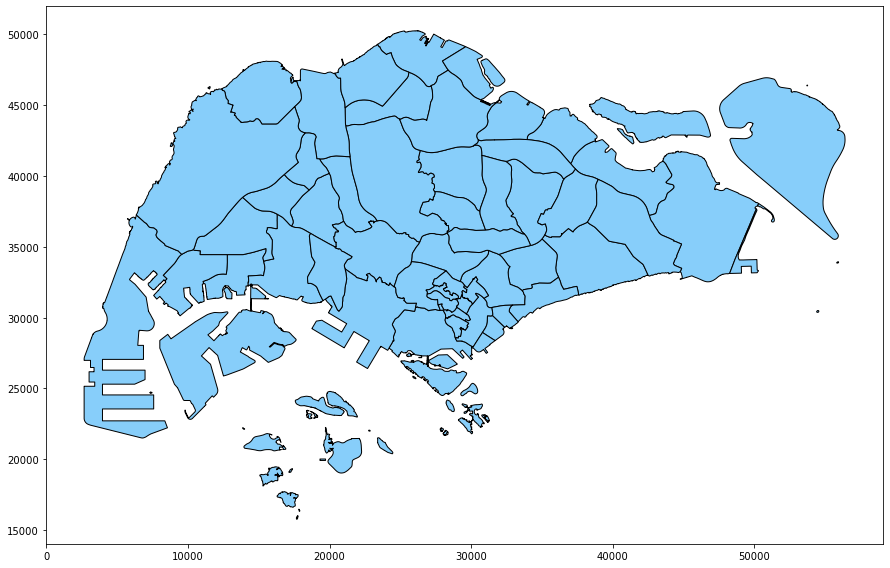

In [72]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, color = 'lightskyblue', edgecolor = 'black')

In [73]:
# adapted from:
# https://geopandas.org/gallery/create_geopandas_from_pandas.html
# create a new column called geometry with a point (longitude, latitude) for each row
df['geometry'] = gpd.points_from_xy(df.LON, df.LAT)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Unnamed: 0,LAT,LON,geometry,district
0,2020-11,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1977,55 years 09 months,338000,220 ANG MO KIO AVE 1 SINGAPORE,0,1.365628,103.840420,POINT (103.84042 1.36563),ANG MO KIO
1,2020-11,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,01 TO 03,67.0,New Generation,1977,55 years 08 months,305000,220 ANG MO KIO AVE 1 SINGAPORE,0,1.365628,103.840420,POINT (103.84042 1.36563),ANG MO KIO
2,2020-11,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1978,56 years 03 months,285000,225 ANG MO KIO AVE 1 SINGAPORE,1,1.367473,103.838065,POINT (103.83807 1.36747),ANG MO KIO
3,2020-11,ANG MO KIO,3 ROOM,308A,ANG MO KIO AVE 1,01 TO 03,70.0,Model A,2012,90 years 11 months,424000,308A ANG MO KIO AVE 1 SINGAPORE,2,1.365515,103.844066,POINT (103.84407 1.36551),ANG MO KIO
4,2020-11,ANG MO KIO,3 ROOM,310C,ANG MO KIO AVE 1,01 TO 03,70.0,Model A,2012,90 years 11 months,420000,310C ANG MO KIO AVE 1 SINGAPORE,3,1.364380,103.844868,POINT (103.84487 1.36438),ANG MO KIO


In [74]:
df['district'] = df['town']
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Unnamed: 0,LAT,LON,geometry,district
0,2020-11,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1977,55 years 09 months,338000,220 ANG MO KIO AVE 1 SINGAPORE,0,1.365628,103.840420,POINT (103.84042 1.36563),ANG MO KIO
1,2020-11,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,01 TO 03,67.0,New Generation,1977,55 years 08 months,305000,220 ANG MO KIO AVE 1 SINGAPORE,0,1.365628,103.840420,POINT (103.84042 1.36563),ANG MO KIO
2,2020-11,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1978,56 years 03 months,285000,225 ANG MO KIO AVE 1 SINGAPORE,1,1.367473,103.838065,POINT (103.83807 1.36747),ANG MO KIO
3,2020-11,ANG MO KIO,3 ROOM,308A,ANG MO KIO AVE 1,01 TO 03,70.0,Model A,2012,90 years 11 months,424000,308A ANG MO KIO AVE 1 SINGAPORE,2,1.365515,103.844066,POINT (103.84407 1.36551),ANG MO KIO
4,2020-11,ANG MO KIO,3 ROOM,310C,ANG MO KIO AVE 1,01 TO 03,70.0,Model A,2012,90 years 11 months,420000,310C ANG MO KIO AVE 1 SINGAPORE,3,1.364380,103.844868,POINT (103.84487 1.36438),ANG MO KIO


In [75]:
avg_price = pd.pivot_table(df, values='resale_price', index=['district'], aggfunc=np.mean)
avg_price.reset_index(inplace=True)
avg_price.head()

,district,resale_price
0,ANG MO KIO,424286.793103
1,BEDOK,418507.219512
2,BISHAN,583612.533333
3,BUKIT BATOK,415976.145455
4,BUKIT MERAH,573612.791209


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

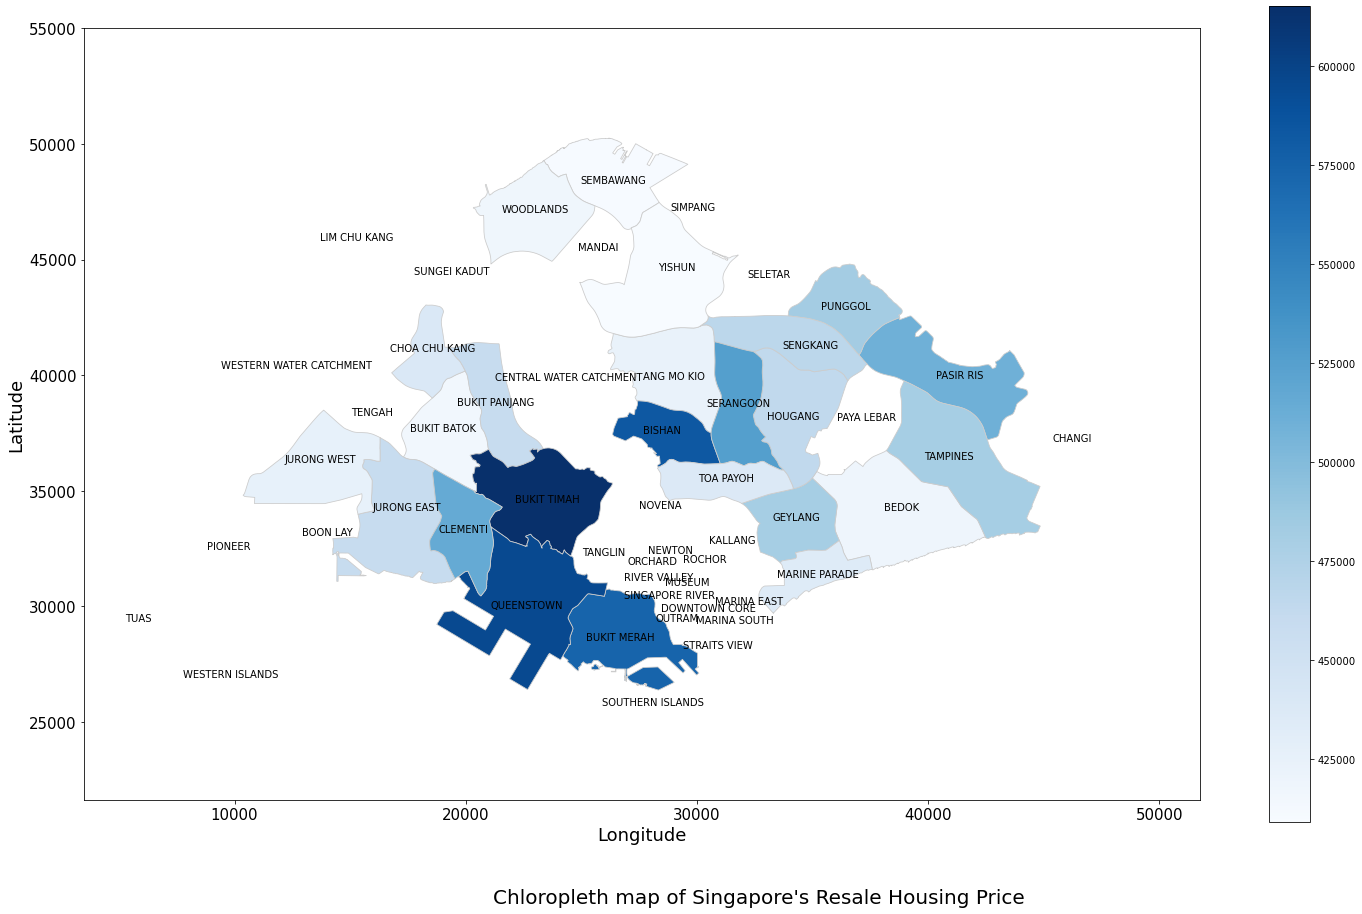

In [84]:
merged_df = street_map.set_index('PLN_AREA_N').join(avg_price.set_index('district'))
merged_df.reset_index(inplace=True)

fig, ax = plt.subplots(1, figsize=(25, 15))
merged_df['coords'] = merged_df['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_df['coords'] = [coords[0] for coords in merged_df['coords']]

for idx, row in merged_df.iterrows():
    plt.annotate(text=row['PLN_AREA_N'], xy=row['coords'], horizontalalignment='center')
    
ax.margins(0.2, 0.2)
ax.set_xlabel('Longitude', fontsize=18)
ax.set_ylabel('Latitude', fontsize=18)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
txt='Chloropleth map of Singapore\'s Resale Housing Price'
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=20)

merged_df.plot(column='resale_price', ax=ax, legend=True, cmap='Blues', linewidth=0.8, edgecolor='0.8')